In [8]:
pip install wbdata

  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [201]:
import wbgapi as wb
import pandas as pd
import wbdata
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




In [30]:
indicator = {"IC.BUS.EASE.DFRN.XQ.DB1719": "Ease of doing business score (DB17-20 methodology)"}
ease_df_17 = wbdata.get_dataframe(indicator, country=["USA", "GBR", "CHE","FRA"])
indicator1 = {"IC.BUS.EASE.DFRN.DB16": "Ease of doing business score (DB15 methodology)"}
ease_df_15 = wbdata.get_dataframe(indicator1, country=["USA", "GBR", "CHE","FRA"])
indicator2 = {"IC.BUS.EASE.DFRN.DB1014": "Ease of doing business score (DB10-14 methodology)"}
ease_df_10 = wbdata.get_dataframe(indicator2, country=["USA", "GBR", "CHE","FRA"])
ease_df_10.head(10)


Ease of doing business score (DB10-14 methodology)
country     date                                                    
Switzerland 2019                                                NaN 
            2018                                                NaN 
            2017                                                NaN 
            2016                                                NaN 
            2015                                                NaN 
            2014                                                NaN 
            2013                                           76.61760 
            2012                                           76.89345 
            2011                                           76.70679 
            2010                                           76.62423

In [194]:
#Merging all the data and filtering NAN. We have long format with all the countries and dates from 2009 onwards. 

ease_df = ease_df_17.merge(ease_df_15, on=['date','country'],how="inner", suffixes=('_17', '_15'))
ease_df['Ease_of_b']= ease_df['Ease of doing business score (DB17-20 methodology)'].combine_first(ease_df['Ease of doing business score (DB15 methodology)'])
ease_df.drop(columns=['Ease of doing business score (DB17-20 methodology)', 'Ease of doing business score (DB15 methodology)','level_0_17','index_17','level_0_15','index_15'], inplace=True)
ease_df = ease_df.merge(ease_df_10, on=['date','country'],how="inner")
ease_df['Ease_of_b']= ease_df['Ease_of_b'].combine_first(ease_df['Ease of doing business score (DB10-14 methodology)'])
ease_df.drop(columns='Ease of doing business score (DB10-14 methodology)', inplace=True)
ease_df.dropna(inplace=True)
ease_df['date']=pd.to_datetime(ease_df['date'])
ease_df['country'] = ease_df['country'].str.replace('United States', 'USA')
ease_df['country'] = ease_df['country'].str.replace('Switzerland', 'CHE')
ease_df['country'] = ease_df['country'].str.replace('United Kingdom', 'GBR')
ease_df['country'] = ease_df['country'].str.replace('France', 'FRA')
ease_df


,country,date,Ease_of_b
0,CHE,2019-01-01,76.61864
1,CHE,2018-01-01,76.61632
2,CHE,2017-01-01,76.60784
3,CHE,2016-01-01,76.42092
4,CHE,2015-01-01,76.42844
5,CHE,2014-01-01,76.88111
6,CHE,2013-01-01,75.36760
7,CHE,2012-01-01,76.89345
8,CHE,2011-01-01,76.70679
9,CHE,2010-01-01,76.62423


In [207]:
#We now need the data from innovation index. 


#First step is the hardest, finding the right URL, search documentation and test out directly on the web
url = "https://datacatalogapi.worldbank.org/dexapps/efi/data?datasetId=WIPO.GII&indicatorIds=WIPO.GII.235&countryCodes=GBR,FRA,USA,CHE&attribute1=Rank&years=01/01/2013,01/01/2014,01/01/2015,01/01/2016,01/01/2017,01/01/2018,01/01/2019"

#fetch it
response = requests.get(url)
list = []
#check it to understand its structure
data = response.json()
for value in data.values():
    list = value


#This is way of filtering the data I need and having it in lists. Then I can manipulate it better. 
year = []
value = []
country = []
for i in range(28):
    if list[i]['COUNTRY_CODE'] == 'GBR':
        country.append(list[i]['COUNTRY_CODE'])
        year.append(list[i]['CAL_YEAR'])
        value.append(list[i]['IND_VALUE'])
    elif list[i]['COUNTRY_CODE'] == 'USA':
        country.append(list[i]['COUNTRY_CODE'])
        year.append(list[i]['CAL_YEAR'])
        value.append(list[i]['IND_VALUE'])
    elif list[i]['COUNTRY_CODE'] == 'FRA':
        country.append(list[i]['COUNTRY_CODE'])
        year.append(list[i]['CAL_YEAR'])
        value.append(list[i]['IND_VALUE'])
    elif list[i]['COUNTRY_CODE'] == 'CHE':
        country.append(list[i]['COUNTRY_CODE'])
        year.append(list[i]['CAL_YEAR'])
        value.append(list[i]['IND_VALUE'])
    
innovation_df = pd.DataFrame({'country': country, 'year': year, 'innovation': value}) #cool way of turning a dictionary into a dataframe
innovation_df['year'] = pd.to_datetime(innovation_df['year'])



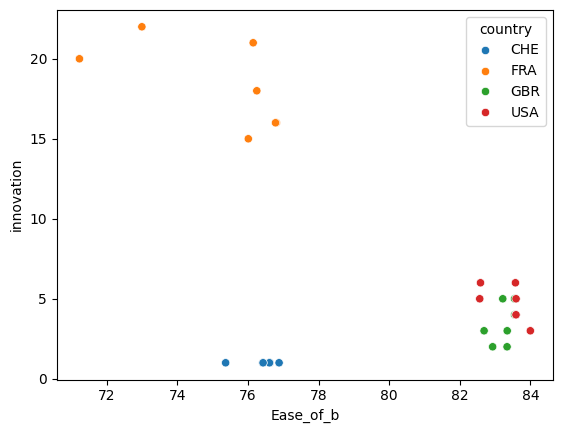

In [205]:
merge_df = ease_df.merge(innovation_df, left_on = ['country','date'], right_on =['country','year'], how ='inner')
merge_df.drop(columns=['date'],inplace=True)

# Basic scatter plot with Seaborn
sns.scatterplot(data=merge_df, x="Ease_of_b", y="innovation",hue='country')

# Show the plot
plt.show()


CHANGE HERE THIS IS SOMETHING ELSE

In [4]:
df_gni = df_gni.reset_index()

In [28]:

df_gni = df_gni.query('economy == ("CHE","USA","EUU","FRA")')
df_gni_long = df_gni.melt(id_vars=['Country', 'economy'], var_name='date', value_name='GNI_per_capita') 
df_gni_long['date'] = df_gni_long['date'].str.replace('YR', '')
df_gni_long = df_gni_long.drop(df_gni_long[df_gni_long['date'] == 'index'].index)
df_gni_long['date'] = pd.to_numeric(df_gni_long['date'])
df_gni_long = df_gni_long.drop(df_gni_long[df_gni_long['date'] < 1980].index)
df_gni_long['date'] = pd.to_datetime(df_gni_long['date'], format='%Y')
df_gni_long = df_gni_long.dropna()
df_gni_long

,Country,economy,date,GNI_per_capita
80,United States,USA,1980-01-01,13390.000000
81,Switzerland,CHE,1980-01-01,22320.000000
82,France,FRA,1980-01-01,13100.000000
83,European Union,EUU,1980-01-01,8391.748603
84,United States,USA,1981-01-01,14360.000000
...,...,...,...,...
251,European Union,EUU,2022-01-01,40157.776770
252,United States,USA,2023-01-01,80300.000000
253,Switzerland,CHE,2023-01-01,95160.000000
254,France,FRA,2023-01-01,45070.000000


In [8]:
import altair as alt


In [29]:


# Create the line chart
chart = alt.Chart(df_gni_long).mark_line().encode(
    x='date:T',  
    y='GNI_per_capita:Q',  
    color='Country:N'
).properties(
    width=600,
    height=400,
    title="Multiple line GNI plot"
)

chart.show()

alt.Chart(...)